In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import random as rnd
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#detailed stats on what every player did during every game
PlayerData = pd.read_csv('/kaggle/input/d/hertzsprungrussell/basketball/PlayerStatistics.csv')

#result of every game 
GameData = pd.read_csv('/kaggle/input/d/hertzsprungrussell/basketball/Games.csv')

GameData.columns
pd.set_option('display.max_columns', None)

/tmp/ipykernel_13/674302171.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  PlayerData = pd.read_csv('/kaggle/input/d/hertzsprungrussell/basketball/PlayerStatistics.csv')
/tmp/ipykernel_13/674302171.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  GameData = pd.read_csv('/kaggle/input/d/hertzsprungrussell/basketball/Games.csv')


In [3]:
#Want to make player stats into team stats to make useful features
team_stats = PlayerData.groupby(['gameId', 'playerteamName']).agg({
    'points': 'sum',
    'assists': 'sum',
    'blocks': 'sum',
    'steals': 'sum',
    'fieldGoalsAttempted': 'sum',
    'fieldGoalsMade': 'sum',
    'threePointersAttempted': 'sum',
    'threePointersMade': 'sum',
    'freeThrowsAttempted': 'sum',
    'freeThrowsMade': 'sum',
    'reboundsDefensive': 'sum',
    'reboundsOffensive': 'sum',
    'reboundsTotal': 'sum',
    'foulsPersonal': 'sum',
    'turnovers': 'sum',
    'plusMinusPoints': 'sum'
}).reset_index()


#want to merge the datasets to make things easier
home_stats = team_stats.rename(columns=lambda x: x if x in ['gameId', 'playerteamName'] else f"home_{x}")
visitor_stats = team_stats.rename(columns=lambda x: x if x in ['gameId', 'playerteamName'] else f"visitor_{x}")


merged = GameData \
    .merge(home_stats, left_on=['gameId', 'hometeamName'], right_on=['gameId', 'playerteamName']) \
    .merge(visitor_stats, left_on=['gameId', 'awayteamName'], right_on=['gameId', 'playerteamName'])

#taking games only from last season
merged = merged.iloc[:1313]
merged.head()




,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,gameLabel,gameSubLabel,seriesGameNumber,playerteamName_x,home_points,home_assists,home_blocks,home_steals,home_fieldGoalsAttempted,home_fieldGoalsMade,home_threePointersAttempted,home_threePointersMade,home_freeThrowsAttempted,home_freeThrowsMade,home_reboundsDefensive,home_reboundsOffensive,home_reboundsTotal,home_foulsPersonal,home_turnovers,home_plusMinusPoints,playerteamName_y,visitor_points,visitor_assists,visitor_blocks,visitor_steals,visitor_fieldGoalsAttempted,visitor_fieldGoalsMade,visitor_threePointersAttempted,visitor_threePointersMade,visitor_freeThrowsAttempted,visitor_freeThrowsMade,visitor_reboundsDefensive,visitor_reboundsOffensive,visitor_reboundsTotal,visitor_foulsPersonal,visitor_turnovers,visitor_plusMinusPoints
0,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,103,91,1610612760,Playoffs,18203.0,1000052,NBA Finals,Game 7,7.0,Thunder,103.0,20.0,8.0,14.0,87.0,35.0,40.0,11.0,31.0,22.0,27.0,13.0,40.0,23.0,7.0,60.0,Pacers,91.0,17.0,4.0,6.0,70.0,29.0,28.0,11.0,29.0,22.0,33.0,12.0,45.0,24.0,21.0,-60.0
1,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,108,91,1610612754,Playoffs,17274.0,1000063,NBA Finals,Game 6,6.0,Pacers,108.0,23.0,5.0,16.0,92.0,38.0,42.0,15.0,25.0,17.0,35.0,11.0,46.0,17.0,10.0,85.0,Thunder,91.0,14.0,4.0,4.0,74.0,31.0,30.0,8.0,26.0,21.0,37.0,4.0,41.0,20.0,21.0,-85.0
2,42400405,2025-06-16 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,120,109,1610612760,Playoffs,18203.0,1000052,NBA Finals,Game 5,5.0,Thunder,120.0,24.0,12.0,15.0,94.0,40.0,32.0,14.0,32.0,26.0,26.0,19.0,45.0,24.0,11.0,55.0,Pacers,109.0,23.0,4.0,9.0,82.0,37.0,30.0,11.0,30.0,24.0,32.0,18.0,50.0,25.0,22.0,-55.0
3,42400404,2025-06-13 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,104,111,1610612760,Playoffs,17274.0,1000063,NBA Finals,Game 4,4.0,Pacers,104.0,21.0,3.0,11.0,80.0,34.0,36.0,11.0,33.0,25.0,26.0,7.0,33.0,27.0,15.0,-35.0,Thunder,111.0,11.0,3.0,12.0,78.0,37.0,16.0,3.0,38.0,34.0,31.0,12.0,43.0,26.0,13.0,35.0
4,42400403,2025-06-11 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,116,107,1610612754,Playoffs,17274.0,1000063,NBA Finals,Game 3,3.0,Pacers,116.0,24.0,11.0,13.0,85.0,44.0,27.0,9.0,22.0,19.0,29.0,7.0,36.0,24.0,13.0,45.0,Thunder,107.0,16.0,4.0,6.0,79.0,37.0,22.0,10.0,30.0,23.0,33.0,9.0,42.0,20.0,17.0,-45.0


In [4]:
#want to make a win_home bianary column for our target 
merged['win_home'] = (merged['homeScore'] > merged['awayScore']).astype(int)

#some percentages to show offensive and defensive efficiency
merged['fg%H'] = merged['home_fieldGoalsMade'] / merged['home_fieldGoalsAttempted'] 
merged['3pt%H'] = merged['home_threePointersMade'] / merged['home_threePointersAttempted'] 
merged['rebound_ratioH'] = merged['home_reboundsOffensive'] / merged['home_reboundsDefensive']
merged['ft%H'] = merged['home_freeThrowsMade'] / merged['home_freeThrowsAttempted']
merged['fg%V'] = merged['visitor_fieldGoalsMade'] / merged['visitor_fieldGoalsAttempted'] 
merged['3pt%V'] = merged['visitor_threePointersMade'] / merged['visitor_threePointersAttempted']
merged['rebound_ratioV'] = merged['visitor_reboundsOffensive'] / merged['visitor_reboundsDefensive']
merged['ft%V'] = merged['visitor_freeThrowsMade'] / merged['visitor_freeThrowsAttempted']


#Differences in eff and stats will likely be helpful as well to show matchup 
#eff diffs
merged['fg%D'] = merged['fg%H'] - merged['fg%V']
merged['3pt%D'] = merged['3pt%H'] - merged['3pt%V']
merged['ft%D'] = merged ['ft%H'] - merged['3pt%V']

#volume diffs
merged['ptsD'] = merged['home_points'] - merged['visitor_points']
merged['rebD'] = merged['home_reboundsTotal'] - merged['visitor_reboundsTotal']
merged['astD'] = merged['home_assists'] - merged['visitor_assists']
merged['tovD'] = merged['home_turnovers'] - merged['visitor_turnovers']
merged['blkD'] = merged['home_blocks'] - merged['visitor_blocks']
merged['stlD'] = merged['home_steals'] - merged['visitor_steals']

merged.head()

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,gameLabel,gameSubLabel,seriesGameNumber,playerteamName_x,home_points,home_assists,home_blocks,home_steals,home_fieldGoalsAttempted,home_fieldGoalsMade,home_threePointersAttempted,home_threePointersMade,home_freeThrowsAttempted,home_freeThrowsMade,home_reboundsDefensive,home_reboundsOffensive,home_reboundsTotal,home_foulsPersonal,home_turnovers,home_plusMinusPoints,playerteamName_y,visitor_points,visitor_assists,visitor_blocks,visitor_steals,visitor_fieldGoalsAttempted,visitor_fieldGoalsMade,visitor_threePointersAttempted,visitor_threePointersMade,visitor_freeThrowsAttempted,visitor_freeThrowsMade,visitor_reboundsDefensive,visitor_reboundsOffensive,visitor_reboundsTotal,visitor_foulsPersonal,visitor_turnovers,visitor_plusMinusPoints,win_home,fg%H,3pt%H,rebound_ratioH,ft%H,fg%V,3pt%V,rebound_ratioV,ft%V,fg%D,3pt%D,ft%D,ptsD,rebD,astD,tovD,blkD,stlD
0,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,103,91,1610612760,Playoffs,18203.0,1000052,NBA Finals,Game 7,7.0,Thunder,103.0,20.0,8.0,14.0,87.0,35.0,40.0,11.0,31.0,22.0,27.0,13.0,40.0,23.0,7.0,60.0,Pacers,91.0,17.0,4.0,6.0,70.0,29.0,28.0,11.0,29.0,22.0,33.0,12.0,45.0,24.0,21.0,-60.0,1,0.402299,0.275000,0.481481,0.709677,0.414286,0.392857,0.363636,0.758621,-0.011987,-0.117857,0.316820,12.0,-5.0,3.0,-14.0,4.0,8.0
1,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,108,91,1610612754,Playoffs,17274.0,1000063,NBA Finals,Game 6,6.0,Pacers,108.0,23.0,5.0,16.0,92.0,38.0,42.0,15.0,25.0,17.0,35.0,11.0,46.0,17.0,10.0,85.0,Thunder,91.0,14.0,4.0,4.0,74.0,31.0,30.0,8.0,26.0,21.0,37.0,4.0,41.0,20.0,21.0,-85.0,1,0.413043,0.357143,0.314286,0.680000,0.418919,0.266667,0.108108,0.807692,-0.005875,0.090476,0.413333,17.0,5.0,9.0,-11.0,1.0,12.0
2,42400405,2025-06-16 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,120,109,1610612760,Playoffs,18203.0,1000052,NBA Finals,Game 5,5.0,Thunder,120.0,24.0,12.0,15.0,94.0,40.0,32.0,14.0,32.0,26.0,26.0,19.0,45.0,24.0,11.0,55.0,Pacers,109.0,23.0,4.0,9.0,82.0,37.0,30.0,11.0,30.0,24.0,32.0,18.0,50.0,25.0,22.0,-55.0,1,0.425532,0.437500,0.730769,0.812500,0.451220,0.366667,0.562500,0.800000,-0.025688,0.070833,0.445833,11.0,-5.0,1.0,-11.0,8.0,6.0
3,42400404,2025-06-13 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,104,111,1610612760,Playoffs,17274.0,1000063,NBA Finals,Game 4,4.0,Pacers,104.0,21.0,3.0,11.0,80.0,34.0,36.0,11.0,33.0,25.0,26.0,7.0,33.0,27.0,15.0,-35.0,Thunder,111.0,11.0,3.0,12.0,78.0,37.0,16.0,3.0,38.0,34.0,31.0,12.0,43.0,26.0,13.0,35.0,0,0.425000,0.305556,0.269231,0.757576,0.474359,0.187500,0.387097,0.894737,-0.049359,0.118056,0.570076,-7.0,-10.0,10.0,2.0,0.0,-1.0
4,42400403,2025-06-11 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,116,107,1610612754,Playoffs,17274.0,1000063,NBA Finals,Game 3,3.0,Pacers,116.0,24.0,11.0,13.0,85.0,44.0,27.0,9.0,22.0,19.0,29.0,7.0,36.0,24.0,13.0,45.0,Thunder,107.0,16.0,4.0,6.0,79.0,37.0,22.0,10.0,30.0,23.0,33.0,9.0,42.0,20.0,17.0,-45.0,1,0.517647,0.333333,0.241379,0.863636,0.468354,0.454545,0.272727,0.766667,0.049293,-0.121212,0.409091,9.0,-6.0,8.0,-4.0,7.0,7.0


In [5]:
#rolling avgs 
merged['fg%rolling5H'] = merged.groupby('hometeamName')['fg%H'].shift(1).rolling(5).mean()
merged['rebound_ratio_rolling5H'] = merged.groupby('hometeamName')['rebound_ratioH'].shift(1).rolling(5).mean()

merged['fg%rolling5V'] = merged.groupby('hometeamName')['fg%V'].shift(1).rolling(5).mean()
merged['rebound_ratio_rolling5V'] = merged.groupby('hometeamName')['rebound_ratioV'].shift(1).rolling(5).mean()

merged['rebDroll'] = merged.groupby('hometeamName')['rebD'].shift(1).rolling(5).mean()
merged['tovDroll'] = merged.groupby('hometeamName')['tovD'].shift(1).rolling(5).mean()
merged['blkDroll'] = merged.groupby('hometeamName')['blkD'].shift(1).rolling(5).mean()
merged['stlDroll'] = merged.groupby('hometeamName')['stlD'].shift(1).rolling(5).mean()

rolling_cols = ['fg%rolling5H','rebound_ratio_rolling5H', 'fg%rolling5V', 'rebound_ratio_rolling5V','rebDroll', 'tovDroll', 'blkDroll', 'stlDroll']

#making rolling features creates some null spots at the beginning of the season
for col in rolling_cols:
    merged[col] = merged[col].fillna(0)
    

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


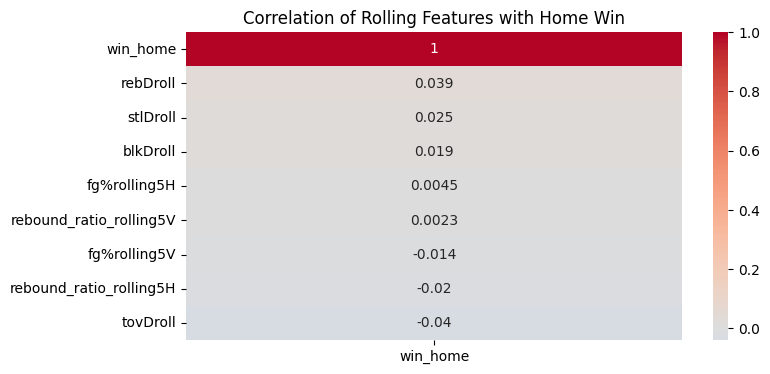

In [6]:
#some visualization

rolling_cols = [c for c in merged.columns if "roll" in c or "exp" in c or "prev" in c]
corr = merged[rolling_cols + ["win_home"]].corr()

plt.figure(figsize=(8, len(rolling_cols)/2))
sns.heatmap(corr[["win_home"]].sort_values(by="win_home", ascending=False), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Rolling Features with Home Win")
plt.show()



In [7]:
features = ['fg%rolling5H','rebound_ratio_rolling5H', 'fg%rolling5V', 'rebound_ratio_rolling5V','rebDroll', 'tovDroll', 'blkDroll', 'stlDroll']

X = merged[features]
Y = merged['win_home']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 12)




## Training Models. 

In [8]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log 


58.1

In [9]:
#Support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

59.05

In [10]:
#Nearest Neighbros
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

73.62

In [11]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

58.48

In [12]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


45.9

## Simulating Application of Kelly Criterion


In [13]:
#need to web scrape historical moneyline odds 
odds_list = []

def to_decimal(odds_list):
    """
    Convert book odds to Decimal odds for Kelly formula
    """
    pass
    

In [14]:
def kelly_criterion(prob_win, odds):
    """
    Calculate Kelly Criterion bet size
    prob_win: probability of winning (0-1)
    odds: decimal odds (e.g., 2.0 for even money)
    """
    if prob_win <= 0 or odds <= 1:
        return 0
    
    # Kelly formula: f = (bp - q) / b,  where b = odds - 1, p = prob_win, q = 1 - prob_win
    b = odds - 1
    p = prob_win
    q = 1 - prob_win
    
    kelly_fraction = (b * p - q) / b
    
    # Don't bet if Kelly is negative
    return max(0, kelly_fraction)

In [15]:
def simulate_betting_strategy(model, X_test, y_test, odds_list, bankroll=1000):
    """
    Simulate betting strategy using Kelly Criterion
    """
    #knn has highest accuracy
    predictions_proba = knn.predict_proba(X_test)[:, 1]  # Probability of home win
    
    results = []
    current_bankroll = bankroll
    
    for i, (prob, actual, odds) in enumerate(zip(predictions_proba, y_test, odds_list)):
        # Calculate Kelly bet size
        kelly_size = kelly_criterion(prob, odds)
        
        # Use fractional Kelly (e.g., 25% of full Kelly) for safety
        bet_fraction = kelly_size * 0.25
        bet_amount = current_bankroll * bet_fraction
        
        if bet_amount > 0:
            if actual == 1:  
                profit = bet_amount * (odds - 1)
                current_bankroll += profit
            else: 
                current_bankroll -= bet_amount
        
        results.append({
            'game': i,
            'prob_home_win': prob,
            'actual_home_win': actual,
            'odds': odds,
            'kelly_fraction': kelly_size,
            'bet_amount': bet_amount,
            'bankroll': current_bankroll
        })
    
    return pd.DataFrame(results)


